## Homework 5 Questions

Same drill as Homework 3, the following questions are intended to get you familiarized with the [provided dataset](https://docs.google.com/spreadsheets/d/1tcqGAlaBOd9L9Lhb9u9_nUg9dSRY1usF80l2RNKiQN0/edit?usp=sharing). By answering these questions, it will hopefully give insights on how to complete the actual task (slide deck generation for the CEO).

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [ ]:
import pandas as pd

gpa_df_RAW = pd.read_csv('GPA_Dataset.csv')
gpa_df_RAW

,Timestamp,What state are you from?,Major (Check all that apply),At what age did you start programming?,Have you at any point attended private school?,Do you have a scholarship?,Do you have a parent in tech?,Do you study with friends?,Do you take notes in classes?,How many credits did you take last semester?,What is your average screentime?,What is your average daily time on Tik Tok or Tik Tok equivalents?,How many hours of sleep do you get a night?,What was your GPA LAST SEMESTER?,What was your GPA THE SEMESTER BEFORE THAT?
0,11/5/2024 14:57:00,NJ,Computer Science,14.0,No,NaN,No parents,Sometimes,"Yes, on a tablet",16,5.0,2.0,7.0,2.780,2.600
1,11/5/2024 14:57:33,VA,Computer Science,8.0,No,Partial,Two parents,Sometimes,"Yes, on paper",17,3.5,1.0,7.0,3.900,3.700
2,11/5/2024 14:57:41,MD,Computer Science,14.0,No,Partial,No parents,Frequently,"Yes, on paper",17,6.5,2.0,8.0,3.900,4.000
3,11/5/2024 14:57:50,VA,Computer Science,14.0,No,Partial,One parent,Frequently,"Yes, on paper",18,6.0,2.0,8.0,4.000,4.000
4,11/5/2024 14:57:54,CA,"Data, Government and Politics",11.0,No,Partial,Two parents,Frequently,"Yes, on a computer",15,5.0,1.0,8.0,4.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,11/14/2024 12:51:59,MD,Computer Science,16.0,No,NaN,One parent,Sometimes,"Yes, on paper",15,5.5,1.0,8.0,3.557,3.504
69,11/14/2024 17:37:45,MD,Computer Science,15.0,No,Full,No parents,Never,"Yes, on paper",17,10.0,1.0,8.0,4.000,4.000
70,11/14/2024 20:44:54,MD,Computer Science,17.0,No,NaN,No parents,Never,"Yes, on paper",16,5.0,2.0,5.0,3.500,3.700
71,11/15/2024 13:21:20,NJ,Computer Science,15.0,No,NaN,One parent,Frequently,"Yes, on paper",17,9.0,3.0,6.0,3.894,3.940


Data cleaning:

In [2]:
# rename columns
short_cols = ['Time', 'State', 'Major', 'Programming Age', 'Private School', 'Scholarship', 'Tech Parents', 'Study With Friends', 'Take Notes', 'Last Sem Credits', 'Avg Screentime', 'Avg Distraction Time', 'Hours of Sleep', 'Last Sem GPA', 'Last Year GPA']

gpa_df_RAW_cols = gpa_df_RAW.columns.to_list()
gpa_df_RAW_col_mapping = dict(zip(gpa_df_RAW_cols, short_cols))
gpa_df_renamed = gpa_df_RAW.rename(columns=gpa_df_RAW_col_mapping)
gpa_df_renamed

,Time,State,Major,Programming Age,Private School,Scholarship,Tech Parents,Study With Friends,Take Notes,Last Sem Credits,Avg Screentime,Avg Distraction Time,Hours of Sleep,Last Sem GPA,Last Year GPA
0,11/5/2024 14:57:00,NJ,Computer Science,14.0,No,NaN,No parents,Sometimes,"Yes, on a tablet",16,5.0,2.0,7.0,2.780,2.600
1,11/5/2024 14:57:33,VA,Computer Science,8.0,No,Partial,Two parents,Sometimes,"Yes, on paper",17,3.5,1.0,7.0,3.900,3.700
2,11/5/2024 14:57:41,MD,Computer Science,14.0,No,Partial,No parents,Frequently,"Yes, on paper",17,6.5,2.0,8.0,3.900,4.000
3,11/5/2024 14:57:50,VA,Computer Science,14.0,No,Partial,One parent,Frequently,"Yes, on paper",18,6.0,2.0,8.0,4.000,4.000
4,11/5/2024 14:57:54,CA,"Data, Government and Politics",11.0,No,Partial,Two parents,Frequently,"Yes, on a computer",15,5.0,1.0,8.0,4.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,11/14/2024 12:51:59,MD,Computer Science,16.0,No,NaN,One parent,Sometimes,"Yes, on paper",15,5.5,1.0,8.0,3.557,3.504
69,11/14/2024 17:37:45,MD,Computer Science,15.0,No,Full,No parents,Never,"Yes, on paper",17,10.0,1.0,8.0,4.000,4.000
70,11/14/2024 20:44:54,MD,Computer Science,17.0,No,NaN,No parents,Never,"Yes, on paper",16,5.0,2.0,5.0,3.500,3.700
71,11/15/2024 13:21:20,NJ,Computer Science,15.0,No,NaN,One parent,Frequently,"Yes, on paper",17,9.0,3.0,6.0,3.894,3.940


In [3]:
# one state with NaN @ row 35
gpa_df_renamed = gpa_df_renamed.drop(35, axis=0)

# someone said they started programming at 1 @ row 43
# empty age @ row 55
gpa_df_renamed = gpa_df_renamed.drop(55, axis=0)

# 29 non empty scholarship (can map remaining NaN -> 'None' string)
gpa_df_renamed['Scholarship'] = gpa_df_renamed['Scholarship'].fillna('None')

# avg screentimes of 60, 90, 120, 323 @ rows 29, 43, 34, 52
# empty screetimes @ rows 16, 63, 64
gpa_df_renamed = gpa_df_renamed.drop([29, 43, 34, 52, 16, 63, 64], axis=0)

# avg distraction times of 30, 30, 34 @ rows 27, 34 (dropped), 52 (dropped)
# empty screetimes @ rows 14, 63 (dropped), 64 (dropped), 66
gpa_df_renamed = gpa_df_renamed.drop([27, 14, 66], axis=0)

# empty hours of sleep @ row 14 (dropped)

# empty last sem gpa @ rows 14 (dropped), 55 (dropped), 64 (dropped)
# empty last year gpa @ rows 14 (dropped), 55 (dropped), 64 (dropped)

gpa_df_renamed

,Time,State,Major,Programming Age,Private School,Scholarship,Tech Parents,Study With Friends,Take Notes,Last Sem Credits,Avg Screentime,Avg Distraction Time,Hours of Sleep,Last Sem GPA,Last Year GPA
0,11/5/2024 14:57:00,NJ,Computer Science,14.0,No,None,No parents,Sometimes,"Yes, on a tablet",16,5.0,2.0,7.0,2.780,2.600
1,11/5/2024 14:57:33,VA,Computer Science,8.0,No,Partial,Two parents,Sometimes,"Yes, on paper",17,3.5,1.0,7.0,3.900,3.700
2,11/5/2024 14:57:41,MD,Computer Science,14.0,No,Partial,No parents,Frequently,"Yes, on paper",17,6.5,2.0,8.0,3.900,4.000
3,11/5/2024 14:57:50,VA,Computer Science,14.0,No,Partial,One parent,Frequently,"Yes, on paper",18,6.0,2.0,8.0,4.000,4.000
4,11/5/2024 14:57:54,CA,"Data, Government and Politics",11.0,No,Partial,Two parents,Frequently,"Yes, on a computer",15,5.0,1.0,8.0,4.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,11/14/2024 12:51:59,MD,Computer Science,16.0,No,None,One parent,Sometimes,"Yes, on paper",15,5.5,1.0,8.0,3.557,3.504
69,11/14/2024 17:37:45,MD,Computer Science,15.0,No,Full,No parents,Never,"Yes, on paper",17,10.0,1.0,8.0,4.000,4.000
70,11/14/2024 20:44:54,MD,Computer Science,17.0,No,None,No parents,Never,"Yes, on paper",16,5.0,2.0,5.0,3.500,3.700
71,11/15/2024 13:21:20,NJ,Computer Science,15.0,No,None,One parent,Frequently,"Yes, on paper",17,9.0,3.0,6.0,3.894,3.940


In [ ]:
# final cleaned dataset
gpa_df_final = gpa_df_renamed.reset_index(drop=True)
gpa_df_final

,Time,State,Major,Programming Age,Private School,Scholarship,Tech Parents,Study With Friends,Take Notes,Last Sem Credits,Avg Screentime,Avg Distraction Time,Hours of Sleep,Last Sem GPA,Last Year GPA
0,11/5/2024 14:57:00,NJ,Computer Science,14.0,No,None,No parents,Sometimes,"Yes, on a tablet",16,5.0,2.0,7.0,2.780,2.600
1,11/5/2024 14:57:33,VA,Computer Science,8.0,No,Partial,Two parents,Sometimes,"Yes, on paper",17,3.5,1.0,7.0,3.900,3.700
2,11/5/2024 14:57:41,MD,Computer Science,14.0,No,Partial,No parents,Frequently,"Yes, on paper",17,6.5,2.0,8.0,3.900,4.000
3,11/5/2024 14:57:50,VA,Computer Science,14.0,No,Partial,One parent,Frequently,"Yes, on paper",18,6.0,2.0,8.0,4.000,4.000
4,11/5/2024 14:57:54,CA,"Data, Government and Politics",11.0,No,Partial,Two parents,Frequently,"Yes, on a computer",15,5.0,1.0,8.0,4.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,11/14/2024 12:51:59,MD,Computer Science,16.0,No,None,One parent,Sometimes,"Yes, on paper",15,5.5,1.0,8.0,3.557,3.504
57,11/14/2024 17:37:45,MD,Computer Science,15.0,No,Full,No parents,Never,"Yes, on paper",17,10.0,1.0,8.0,4.000,4.000
58,11/14/2024 20:44:54,MD,Computer Science,17.0,No,None,No parents,Never,"Yes, on paper",16,5.0,2.0,5.0,3.500,3.700
59,11/15/2024 13:21:20,NJ,Computer Science,15.0,No,None,One parent,Frequently,"Yes, on paper",17,9.0,3.0,6.0,3.894,3.940


1. Which was the most predictive factor for GPA? i.e., which factor had the most "power" over predicting the GPA?

Your answer:

In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# q1 copy of dataset
df = gpa_df_final.copy(deep=True)

# 'Last Sem GPA' is the target column to predict
# seperate features (X) and target (y)
target_col = 'Last Sem GPA'
features = df.drop(columns=[target_col])
y = df[target_col]

# identify numerical and categorical columns
# assume GPA columns, hours of sleep, etc. are numeric,
# assume 'Major', 'State', 'Scholarship', etc. are categorical.
numeric_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = features.select_dtypes(exclude=[np.number]).columns.tolist()

# drop last year gpa and timestamp for predicting last sem gpa
numeric_features.remove('Last Year GPA')
categorical_features.remove('Time')


# define transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# split the data
X_train, X_test, y_train, y_test = train_test_split(features, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# create a pipeline with the preprocessor and the model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# fit & evaluate the model
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

# extract feature importances
# get the column names after OneHotEncoding:
onehot_cols = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# combine numeric and one-hot-encoded categorical feature names
feature_names = numeric_features + list(onehot_cols)

# get the trained RandomForestRegressor from the pipeline
rf = model.named_steps['regressor']

# pair feature names with their importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print(f"The most predictive factor of students' GPA last semester apprears to be {feature_importance_df.iloc[0][0]} with an importance value of {feature_importance_df.iloc[0][1].round(4)}")
feature_importance_df.head()

The most predictive factor of students' GPA last semester apprears to be Last Sem Credits with an importance value of 0.1813


,feature,importance
1,Last Sem Credits,0.181298
2,Avg Screentime,0.125689
8,State_NY,0.110441
0,Programming Age,0.097460
4,Hours of Sleep,0.094692


2. Which factor(s) didn't matter in predicting the GPA?

Your answer:

In [54]:
rev_feature_importance = feature_importance_df.sort_values('importance').head(5)

print("The 5 least predictive factor of students' GPA last semester apprear to be:")
for i in range(5):
    print(f"- {rev_feature_importance.iloc[i][0]} with an importance value of {rev_feature_importance.iloc[i][1].round(4)}")    
rev_feature_importance

The 5 least predictive factor of students' GPA last semester apprear to be:
- Major_Computer Science, Biochemistry with an importance value of 0.0
- Major_Computer Science, Entrepreneurship and Innovation with an importance value of 0.0008
- State_PA with an importance value of 0.0018
- Major_Data, Government and Politics with an importance value of 0.0026
- State_Non-US with an importance value of 0.0037


,feature,importance
13,"Major_Computer Science, Biochemistry",0.000027
14,"Major_Computer Science, Entrepreneurship and I...",0.000786
10,State_PA,0.001815
15,"Major_Data, Government and Politics",0.002577
9,State_Non-US,0.003655


3. Besides the GPA information, which two questions had the highest correlation?

Your answer:

The highest correlation of 0.9 occurs between Scholarship_Partial v.s. Scholarship_None


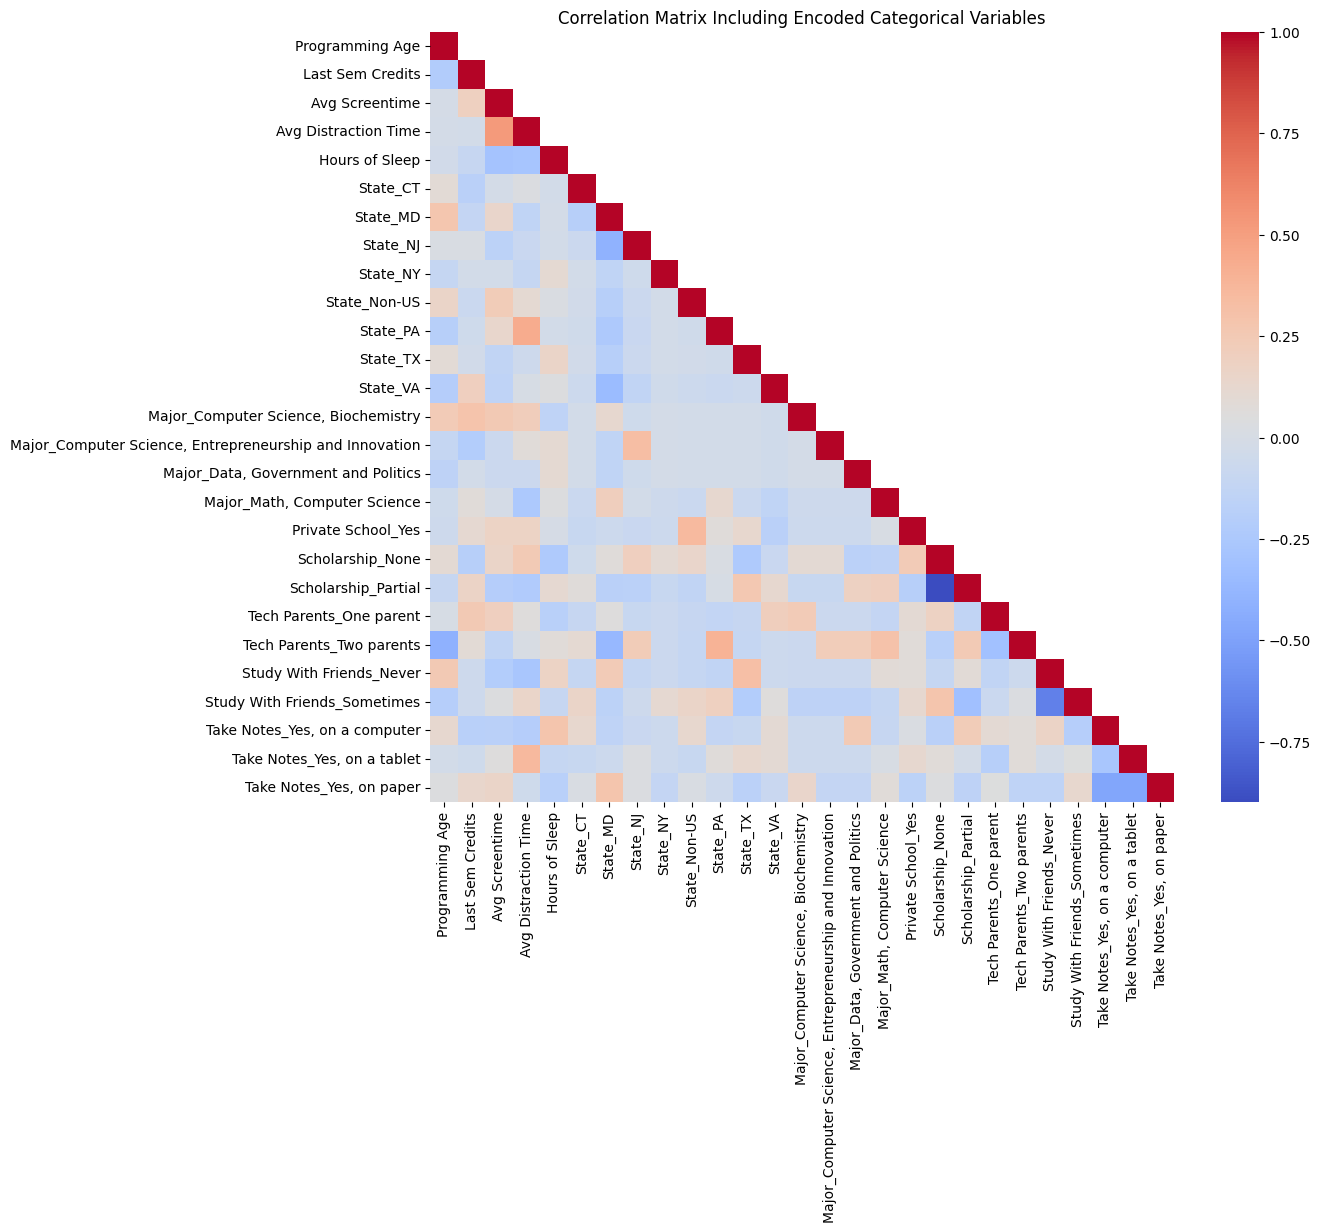

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# q1 copy of dataset
df = gpa_df_final.copy(deep=True)

features = df.drop(columns=['Last Year GPA', 'Last Sem GPA'])

numeric_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = features.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_features.remove('Time')

# Impute missing values if needed
numeric_imputer = SimpleImputer(strategy='mean')
features3[numeric_features] = numeric_imputer.fit_transform(features[numeric_features3])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoded_cat = encoder.fit_transform(features[categorical_features3]).toarray()

# Get new column names for one-hot encoded columns
encoded_cat_cols = encoder.get_feature_names_out(categorical_features)

# Create a new DataFrame with encoded categorical columns
df_encoded_cat = pd.DataFrame(encoded_cat, columns=encoded_cat_cols, index=features.index)

# Combine numeric and encoded categorical data
df_all_numeric = pd.concat([features[numeric_features], df_encoded_cat], axis=1)

# Compute correlation matrix
corr_matrix = df_all_numeric.corr()
lower_triangle = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

abs_corr = corr_matrix.abs()
lower_triangle_abs = abs_corr.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
stacked_abs_corr = lower_triangle_abs.stack()

print(f"The highest correlation of {stacked_abs_corr.max().round(2)} occurs between {stacked_abs_corr.idxmax()[0]} v.s. {stacked_abs_corr.idxmax()[1]}")

plt.figure(figsize=(12,10))
sns.heatmap(lower_triangle, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Including Encoded Categorical Variables')
plt.show()

4. Which one had more impact on students' quality of sleep, the amount of screen time or course load?

Your answer:

In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a copy of the dataset
df = gpa_df_final.copy(deep=True)

# 2. Define the target variable
target_col = 'Hours of Sleep'

# 3. Separate features (X) and target (y)
selected_features = ['Avg Screentime', 'Last Sem Credits']
features = df[selected_features]
y = df[target_col]

# 4. Define preprocessor
preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# 6. Create a pipeline with the preprocessor and the Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 7. Fit the model to the training data
model.fit(X_train, y_train)

# 8. Evaluate the model
score = model.score(X_test, y_test)
# 9. Extract feature importances
# Since we have only two features, feature importances are straightforward
# Access the trained RandomForestRegressor
rf = model.named_steps['regressor']

# Retrieve the feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance': importances
}).sort_values('importance', ascending=False)

# 10. Display the feature importances
corr_screen_sleep = abs_corr.loc['Avg Screentime', target_col]
corr_course_sleep = abs_corr.loc['Last Sem Credits', target_col]
corr_top_importance = corr_screen_sleep if max(corr_screen_sleep,corr_course_sleep) == corr_screen_sleep else 'Last Sem Credits'
corr_top_feature = 'Avg Screentime' if max(corr_screen_sleep,corr_course_sleep) == corr_screen_sleep else corr_course_sleep
print(f"Using the correlation matrix, the feature with more impact on students' quality of sleep is '{corr_top_feature}' with an absolute correlation value of {corr_top_importance:.4f}.")
print(f"Using the regression model, the feature with more impact on students' quality of sleep is '{top_feature}' with an importance value of {top_importance:.4f}.")
feature_importance_df

Using the correlation matrix, the feature with more impact on students' quality of sleep is 'Avg Screentime' with an absolute correlation value of 0.2909.
Using the regression model, the feature with more impact on students' quality of sleep is 'Avg Screentime' with an importance value of 0.6259.


,feature,importance
0,Avg Screentime,0.625864
1,Last Sem Credits,0.374136


5. Does having a parent (or more) in tech have impact on the starting age for programming?

Your answer:

Descriptive Statistics by Group:
              count       mean       std   min    25%   50%   75%   max
Tech Parents                                                           
No parents     32.0  15.468750  2.782252  10.0  13.75  16.0  17.0  23.0
One parent     14.0  14.500000  2.980707  10.0  12.25  14.5  16.0  20.0
Two parents    15.0  12.333333  2.439750   8.0  11.00  12.0  13.0  18.0


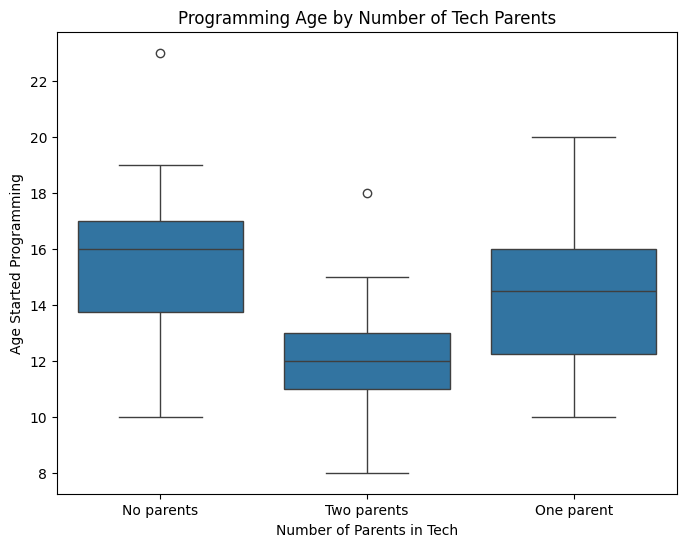


Shapiro-Wilk Test for Normality:
No parents: Statistics=0.950, p-value=0.141
Two parents: Statistics=0.943, p-value=0.425
One parent: Statistics=0.967, p-value=0.840

Levene’s Test for Homogeneity of Variances: Statistics=0.612, p-value=0.546

One-Way ANOVA: F-statistic=6.636, p-value=0.003 < 0.05
We can conclude that there are significant differences in the starting age for programming based on the number of parents in tech.


In [93]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a copy of the dataset
df = gpa_df_final.copy(deep=True)

# 2. Select relevant columns and drop missing values
data = df[['Tech Parents', 'Programming Age']]

# 3. Descriptive Statistics
print("Descriptive Statistics by Group:")
print(data.groupby('Tech Parents')['Programming Age'].describe())

# 4. Visualization: Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Tech Parents', y='Programming Age', data=data)
plt.title('Programming Age by Number of Tech Parents')
plt.xlabel('Number of Parents in Tech')
plt.ylabel('Age Started Programming')
plt.show()

# 6. Testing Normality: Shapiro-Wilk Test
print("\nShapiro-Wilk Test for Normality:")
for group in data['Tech Parents'].unique():
    stat, p = stats.shapiro(data[data['Tech Parents'] == group]['Programming Age'])
    print(f"{group}: Statistics={stat:.3f}, p-value={p:.3f}")

# 7. Testing Homogeneity of Variances: Levene’s Test
groups = [group['Programming Age'].values for name, group in data.groupby('Tech Parents')]
stat, p = stats.levene(*groups)
print(f"\nLevene’s Test for Homogeneity of Variances: Statistics={stat:.3f}, p-value={p:.3f}")

# 8. One-Way ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nOne-Way ANOVA: F-statistic={f_stat:.3f}, p-value={p_val:.3f} {'<' if p_val < 0.05 else '>'} 0.05")
print(f"We can conclude that there are significant differences in the starting age for programming based on the number of parents in tech.")

6. Assume that the students who gave response to this survey have a consistent studying habit. Based on that assumption, does studying with friends help with grades? What about note taking?



Your answer:

Descriptive Statistics by Group:
                    count      mean       std   min     25%    50%    75%  max
Study With Friends                                                            
Frequently           11.0  3.724455  0.331056  3.00  3.6125  3.894  3.985  4.0
Never                15.0  3.708333  0.249568  3.30  3.5200  3.756  3.939  4.0
Sometimes            35.0  3.621114  0.372837  2.78  3.4075  3.700  3.975  4.0

                    count      mean       std   min      25%    50%   75%  max
Take Notes                                                                    
No                    7.0  3.653714  0.365235  2.90  3.58800  3.800  3.85  4.0
Yes, on a computer   13.0  3.673000  0.245520  3.28  3.52000  3.625  3.88  4.0
Yes, on a tablet     13.0  3.459385  0.392468  2.78  3.16100  3.478  3.75  4.0
Yes, on paper        28.0  3.751286  0.316038  2.92  3.54275  3.900  4.00  4.0


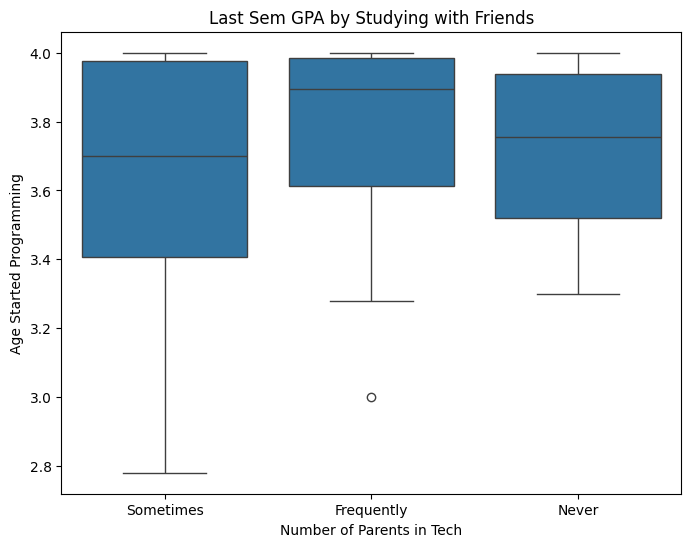

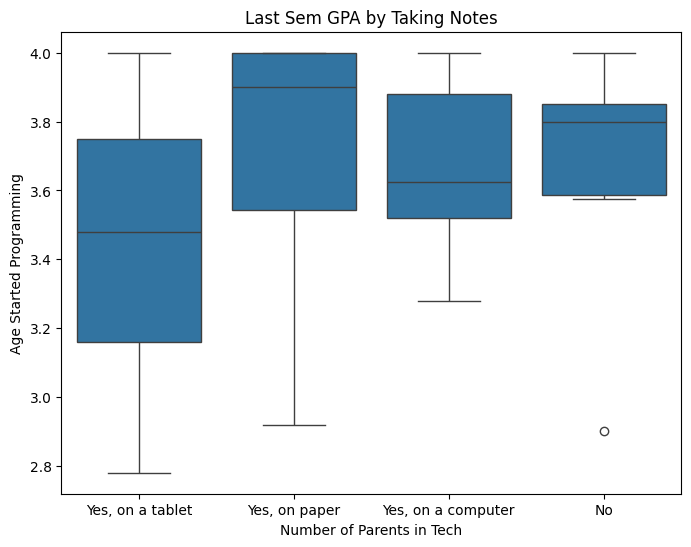


Levene’s Test for Homogeneity of Variances (Study vs GPA): Statistics=1.032, p-value=0.363

Kruskal-Wallis Test for Studying with Friends: H-statistic=0.670, p-value=0.715
Result: No significant differences in grades across Studying with Friends groups.

Levene’s Test for Homogeneity of Variances (Notes vs GPA): Statistics=0.730, p-value=0.539

Kruskal-Wallis Test for Note-Taking: H-statistic=6.384, p-value=0.094
Result: No significant differences in grades across Note-Taking groups.


In [102]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a copy of the dataset
df = gpa_df_final.copy(deep=True)

# 2. Select relevant columns and drop missing values
data = df[['Study With Friends', 'Take Notes', 'Last Sem GPA']]

# 3. Descriptive Statistics
print("Descriptive Statistics by Group:")
print(data.groupby('Study With Friends')['Last Sem GPA'].describe())
print()
print(data.groupby('Take Notes')['Last Sem GPA'].describe())

# 4. Visualization: Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Study With Friends', y='Last Sem GPA', data=data)
plt.title('Last Sem GPA by Studying with Friends')
plt.xlabel('Number of Parents in Tech')
plt.ylabel('Age Started Programming')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Take Notes', y='Last Sem GPA', data=data)
plt.title('Last Sem GPA by Taking Notes')
plt.xlabel('Number of Parents in Tech')
plt.ylabel('Age Started Programming')
plt.show()

# 7. Testing Homogeneity of Variances: Levene’s Test
groups = [group['Last Sem GPA'].values for name, group in data.groupby('Study With Friends')]
stat, p = stats.levene(*groups)
print(f"\nLevene’s Test for Homogeneity of Variances (Study vs GPA): Statistics={stat:.3f}, p-value={p:.3f}")

# Kruskal-Wallis H-Test for Studying with Friends
kruskal_friends = stats.kruskal(*groups)
print(f"\nKruskal-Wallis Test for Studying with Friends: H-statistic={kruskal_friends.statistic:.3f}, p-value={kruskal_friends.pvalue:.3f}")

# Interpretation
if kruskal_friends.pvalue < 0.05:
    print("Result: Significant differences in grades across Studying with Friends groups.")
else:
    print("Result: No significant differences in grades across Studying with Friends groups.")


# 8. One-Way ANOVA
groups = [group['Last Sem GPA'].values for name, group in data.groupby('Take Notes')]
stat, p = stats.levene(*groups)
print(f"\nLevene’s Test for Homogeneity of Variances (Notes vs GPA): Statistics={stat:.3f}, p-value={p:.3f}")

# Kruskal-Wallis H-Test for Note-Taking
kruskal_notes = stats.kruskal(*groups)
print(f"\nKruskal-Wallis Test for Note-Taking: H-statistic={kruskal_notes.statistic:.3f}, p-value={kruskal_notes.pvalue:.3f}")

# Interpretation
if kruskal_notes.pvalue < 0.05:
    print("Result: Significant differences in grades across Note-Taking groups.")
else:
    print("Result: No significant differences in grades across Note-Taking groups.")